# <font color='Black'> **Construíndo Máquinas Preditivas** </font>



⚠️ **Importante:** este notebook salva o modelo treinado em `models/maquina_preditiva.pkl`.

Certifique-se de manter essa pasta no repositório (mesmo vazia, com `.gitkeep`) para o app Streamlit encontrar o modelo.

In [ ]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Importação dos Dados
clientes_tratado = pd.read_csv('/data/processed/clientes_tratado.csv')

# Separando variáveis Explicativas e Variável TARGET
X = clientes_tratado[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = clientes_tratado.aprovacao_emprestimo
X.shape, y.shape

# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [ ]:
x_train

,sexo,estado_civil,renda,emprestimo,historico_credito
132,0.0,1.0,3522,81.0,1.0
3,0.0,0.0,6000,141.0,1.0
442,0.0,0.0,3333,70.0,1.0
59,0.0,1.0,5266,187.0,1.0
326,0.0,1.0,1600,239.0,1.0
...,...,...,...,...,...
211,1.0,0.0,2876,90.0,1.0
67,0.0,0.0,2366,136.0,1.0
25,0.0,1.0,3500,114.0,1.0
196,1.0,0.0,3427,138.0,1.0


In [ ]:
#Importando Pacotes para Construção das Máquinas Preditivas com Machine Learning

## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier()
maquina.fit(x_train, y_train)

RandomForestClassifier()

# Avaliando a Máquina Preditiva

In [ ]:
#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina)

1.0

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina)

0.7604166666666666

  ### 2ª Versão da Máquina Preditiva: Batendo o Baseline

Usando o Hiperparâmetro "**max_depth**" para diminuir "overfiting"

In [ ]:
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier(max_depth=4, random_state = 7)
maquina.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina_treino)

0.8229166666666666

In [ ]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

0.78125

### Verificando as Variáveis mais importantes

In [ ]:
#Importancia das Variáveis
maquina.feature_importances_

array([0.0226187 , 0.03447823, 0.17332143, 0.17593175, 0.59364989])

[0.0226187  0.03447823 0.17332143 0.17593175 0.59364989]


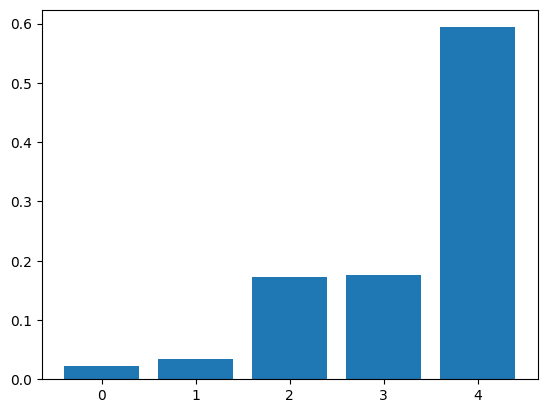

In [ ]:
#Importancia das Variáveis com Gráfico
print(maquina.feature_importances_)
# plot
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

In [ ]:
#['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']

### Salvar Máquina Preditiva


In [ ]:
# Comando de salvamento da máquina preditiva (salva em models/)
from pathlib import Path
import pickle

models_dir = Path("models")
models_dir.mkdir(parents=True, exist_ok=True)

model_path = models_dir / "maquina_preditiva.pkl"
with open(model_path, "wb") as f:
    pickle.dump(maquina, f)

print(f"✅ Modelo salvo em: {model_path.resolve()}")
